In [3]:
import pandas as pd
import scipy 
from statistics import stdev 
from math import sqrt
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import t

In [4]:
nvidia = pd.read_csv('NVIDIA (1999-2023).csv')
amd = pd.read_csv('AMD (1980-2023).csv')

In [9]:
class Imputer:
    def __init__(self,data):
        self.data=data
        
    def parse_dates(self):
        self.data['Date']=self.data.Date.apply(lambda x:pd.Timestamp(x))

    def data_after(self,time: str):
        self.data=self.data[self.data.Date >= pd.Timestamp(time)]
    
    def activate(self,time:str):
        self.parse_dates()
        self.data_after(time)
        return self.data

In [19]:
nvidia = Imputer(nvidia).activate("2020-01-01")
amd = Imputer(amd).activate("2020-01-01")

In [20]:
merged_df = pd.merge(nvidia.iloc[:,[0,5]], amd.iloc[:,[0,5]], on="Date", how="outer")
merged_df.columns = ["Date", "Adj_Close_NVIDIA", "Adj_Close_AMD"]
merged_df1 = merged_df.drop(columns = 'Date')
display(merged_df)


,Date,Adj_Close_NVIDIA,Adj_Close_AMD
0,2020-01-02,59.760399,49.099998
1,2020-01-03,58.803871,48.599998
2,2020-01-06,59.050472,48.389999
3,2020-01-07,59.765388,48.250000
4,2020-01-08,59.877476,47.830002
...,...,...,...
820,2023-04-05,268.809998,92.559998
821,2023-04-06,270.369995,92.470001
822,2023-04-10,275.790009,95.480003
823,2023-04-11,271.690002,94.029999


In [21]:
nvidia1 = merged_df['Adj_Close_NVIDIA']
amd1 = merged_df['Adj_Close_AMD']

## Teste T
Hipotese 0 H0 = Média das ações na pandemia da NVIDIA = Média das ações na pandemia da AMD

Hipotese 1 H1 Média das ações na pandemia da NVIDIA ≠ Média das ações na pandemia da AMD
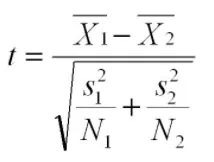

In [22]:
def t_statistic(): 
    alpha = 0.05 # escolhendo um nível alfa
  
    nvidia_mean = merged_df['Adj_Close_NVIDIA'].mean() #Média da nvidia X barra 1
    amd_mean = merged_df['Adj_Close_AMD'].mean() #Média da amd X barra 2
    dif = nvidia_mean - amd_mean #diferença das médias

    std_nvidia = stdev(merged_df['Adj_Close_NVIDIA']) #desvio padrao da nvidia s^2 1
    std_amd = stdev(merged_df['Adj_Close_AMD']) #devio padrao da amd s^2 2
    
    n_nvidia = len(merged_df['Adj_Close_NVIDIA']) #Numero de elementos na amostra N1 nvidia
    n_amd = len(merged_df['Adj_Close_AMD']) #Numero de elementos na amostra N2 amd    
    dbm = sqrt(((std_nvidia**2)/n_nvidia) + ((std_amd**2)/n_amd)) #Erro Padrão dessas duas amostras juntas (Denominador)
    
    t = dif/dbm # t valor
    
    df = n_nvidia + n_amd - 2 #Grau de liberdade
    
    crit_val =  scipy.stats.t.ppf(1.0 -alpha, df) 
    
    p = (1 - scipy.stats.t.cdf(abs(t), df)) * 2
    
    return t, df, crit_val, p
t_stats, df, cv, p = t_statistic() 
print(f'T-statistc: {t_stats}')
print(f'Degrees of freedom: {df}')
print(f'T-critical value: {cv}')
print(f'P-value: {p}')

T-statistc: 33.12634819243399
Degrees of freedom: 1648
T-critical value: 1.645778767293261
P-value: 0.0


In [14]:
from scipy.stats import ttest_ind

In [23]:
stat, p = ttest_ind(nvidia1, amd1)
print(f'T-statistic: {stat}')
print(f'P-value: {p}')

T-statistic: 33.12634819243399
P-value: 7.239358972768469e-185


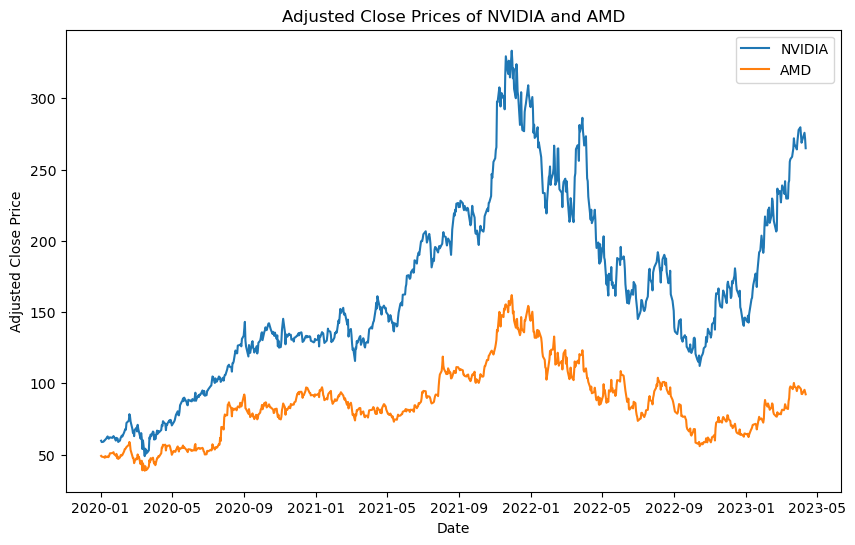

In [28]:
plt.figure(figsize=(10, 6))
plt.plot(merged_df['Date'], merged_df['Adj_Close_NVIDIA'], label='NVIDIA')
plt.plot(merged_df['Date'], merged_df['Adj_Close_AMD'], label='AMD')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.title('Adjusted Close Prices of NVIDIA and AMD')
plt.legend()
plt.show()


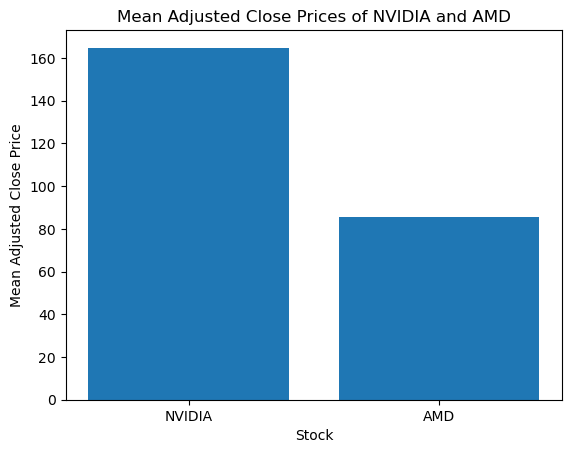

In [25]:
labels = ['NVIDIA', 'AMD']
means = [merged_df['Adj_Close_NVIDIA'].mean(), merged_df['Adj_Close_AMD'].mean()]

plt.bar(labels, means)
plt.xlabel('Stock')
plt.ylabel('Mean Adjusted Close Price')
plt.title('Mean Adjusted Close Prices of NVIDIA and AMD')
plt.show()


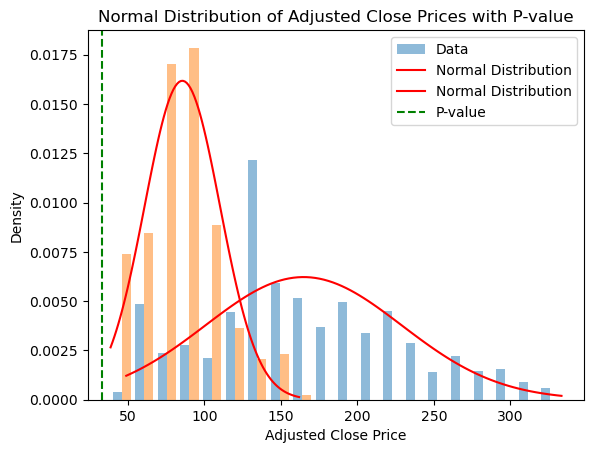

In [29]:
# Calculando os parâmetros da distribuição normal
mean = merged_df1.mean()
std = merged_df1.std()

# Plotando o histograma dos dados
plt.hist(merged_df1, bins=20, density=True, alpha=0.5, label='Data')

# Criando a distribuição normal
dist = scipy.stats.norm(mean, std)

# Plotando a densidade de probabilidade da distribuição normal
x = np.linspace(merged_df1.min(), merged_df1.max(), 100)
plt.plot(x, dist.pdf(x), 'r-', label='Normal Distribution')

# Marcando o ponto P obtido
plt.axvline(t_stats, color='g', linestyle='--', label='P-value')

plt.xlabel('Adjusted Close Price')
plt.ylabel('Density')
plt.title('Normal Distribution of Adjusted Close Prices with P-value')
plt.legend()
plt.show()
